Instructions

### Step 1: Make a new Jupyter notebook

### Step 2: Get a CORGIS dataset

    In class this week, I looked at the Classics dataset from CORGIS: The Collection of Really Great, Interesting, Situated Datasets
    Chose another dataset from CORGIS [here](https://corgis-edu.github.io/corgis/csv) and download the CSV file
        If you go to any topic's page, you'll find the csv file download link under "Download"

### Step 2: Look at descriptive statistics of this dataset

    Use pandas in your notebook to import this data into a dataframe
    Print descriptive statistics about the columns using the "describe" method
    Choose a numerical column (which I'll call COL1) and calculate the mean, median, mode, and trimmed mean.
        Don't use the "describe" method, but you can use other convenient pandas methods to do this if you want
        For the trimmed mean, you can choose what to trim, but comment on the amount you're choosing to trim.
    Plot a histogram of COL1 data and comment on the relative locations of the mean, median, mode, and trimmed mean.
    Calculate the mean absolute deviation, the standard deviation, and the interquartile range (the difference of the 75% and 25% quantile)
        Comment as well on how they compare to each other and to the histogram plot.
    Plot a box plot of COL1
        Comment on how the locations of the calculated median and the 25% and 75% quantiles match with features in the plot
    Make a new column in your dataframe called "COL1_mean_split"
        The values in the "COL1_mean_split" column should be equal to either 0, 1, or 2.  For any given row:
            If the COL1 value < 0.5 * (COL1 mean), set the COL1_mean_split value to 0
            If the COL1 value >= 0.5 * (COL1 mean) and COL1 value < (COL1 mean), set the COL1_mean_split value to 1
            If the COL1 value >= (COL1 mean), set the COL1_mean_split value to 2
    Make a bar plot showing the count of the values of 0, 1, and 2 in the COL1_mean_split column
    Make another box plot of the COL1 values grouped by COL1_mean_split values
        There should be three boxes in the plot, one for each group of rows corresponding to COL1_mean_split values of 0, 1, or 2
    Choose another numerical column (COL3)
        Calculate the correlation between COL1 and COL3
        Make a scatter plot of COL1 vs COL3 and comment on whether the calculated correlation value makes sense.
        Make a hexagonal binning plot of COL1 vs COL3
    BONUS POINT (optional):
        Make a facet grid using the seaborn library, where you plot a hexagonal binning plot of COL1 and COL3 grouped into different facets based on the three values of COL1_mean_split

### Step 3: When you are done, commit the notebook to your "csx4501" repository on GitHub and submit the url for your repository.

In [21]:
import pandas as pd
import matplotlib_inline
import matplotlib.pyplot as plt

data = pd.read_csv('finance.csv')

In [3]:
data.describe()

,Year,Totals.Capital outlay,Totals.Revenue,Totals.Expenditure,Totals.General expenditure,Totals.General revenue,Totals.Insurance trust revenue,Totals.Intergovernmental,Totals.License tax,Totals.Selective sales tax,...,Details.Welfare.Welfare Institution Total Expenditure,Details.Natural Resources.Parks.Parks Total Expenditure,Details.Transportation.Highways.Highways Total Expenditure,Totals. Debt at end of fiscal year,Details.Insurance benefits and repayments,Details.Interest on debt,Details.Interest on general debt,Details.Miscellaneous general revenue,Details.Other taxes,Details.Police protection
count,1051.000000,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,...,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03,1.051000e+03
mean,2004.660324,1.897134e+06,3.214530e+07,3.016482e+07,2.601980e+07,2.611299e+07,5.734721e+06,8.127423e+06,8.052776e+05,2.106018e+06,...,7.749695e+06,1.054444e+05,1.851621e+06,1.569157e+07,3.683345e+06,7.383553e+05,7.059350e+05,2.054346e+06,6.716348e+05,2.306463e+05
std,9.106656,2.870673e+06,5.438942e+07,4.926051e+07,4.221715e+07,4.257791e+07,1.205031e+07,1.313870e+07,1.420171e+06,3.270740e+06,...,1.413716e+07,1.831275e+05,2.718455e+06,2.713353e+07,6.420024e+06,1.327405e+06,1.239537e+06,3.107746e+06,1.190691e+06,3.642294e+05
min,1992.000000,1.075010e+05,1.756015e+06,1.564882e+06,1.489533e+06,1.518437e+06,-3.057854e+06,4.122110e+05,5.483100e+04,5.634800e+04,...,1.914680e+05,4.297000e+03,1.570050e+05,4.857870e+05,7.534900e+04,1.958400e+04,1.958400e+04,1.133920e+05,0.000000e+00,4.953000e+03
25%,1997.000000,5.854825e+05,8.600680e+06,7.908556e+06,7.010340e+06,7.277203e+06,1.009524e+06,2.166264e+06,2.164310e+05,5.752545e+05,...,1.658130e+06,2.783150e+04,6.533915e+05,3.580874e+06,7.434435e+05,1.759635e+05,1.700795e+05,5.639710e+05,1.015030e+05,5.637550e+04
50%,2002.000000,1.175827e+06,1.792744e+07,1.682284e+07,1.480797e+07,1.490660e+07,2.363675e+06,4.246338e+06,4.365300e+05,1.253416e+06,...,3.537787e+06,5.668000e+04,1.213571e+06,7.112560e+06,1.661962e+06,3.547030e+05,3.332750e+05,1.204621e+06,2.970940e+05,1.288010e+05
75%,2014.000000,2.135430e+06,3.671037e+07,3.445796e+07,3.002829e+07,2.969924e+07,6.182907e+06,9.401104e+06,8.807885e+05,2.517735e+06,...,8.370548e+06,1.245245e+05,2.213276e+06,1.634219e+07,4.365773e+06,8.029520e+05,8.029520e+05,2.602960e+06,7.942965e+05,2.718625e+05
max,2019.000000,6.444118e+07,1.095862e+09,9.300366e+08,8.276535e+08,8.648634e+08,2.233112e+08,2.407888e+08,2.966758e+07,7.137166e+07,...,2.079262e+08,4.472668e+06,6.361972e+07,4.831171e+08,9.119805e+07,2.758960e+07,2.677566e+07,7.346321e+07,2.554201e+07,8.038265e+06


In [18]:
print("Total Revenue mean: ", data['Totals.Revenue'].mean())
print("Total Revenue median: ", data['Totals.Revenue'].median())
print("Total Revenue trimmed mean: ", data.loc[int(0.1*len(data)):int(0.9*len(data)),'Totals.Revenue'].mean())
print("Total Revenue has no mode: ", data['Totals.Revenue'].mode())
#print("Total Revenue trimmed mean: ", data['Totals.Revenue'].mean())

Total Revenue mean:  32145301.488106564
Total Revenue median:  17927436.0
Total Revenue trimmed mean:  29850396.903686088
Total Revenue has no mode:  0          1756015
1          1900972
2          1942160
3          1952812
4          2010008
           ...    
1046     344302107
1047     404602274
1048     430760445
1049     436479413
1050    1095861887
Length: 1051, dtype: int64


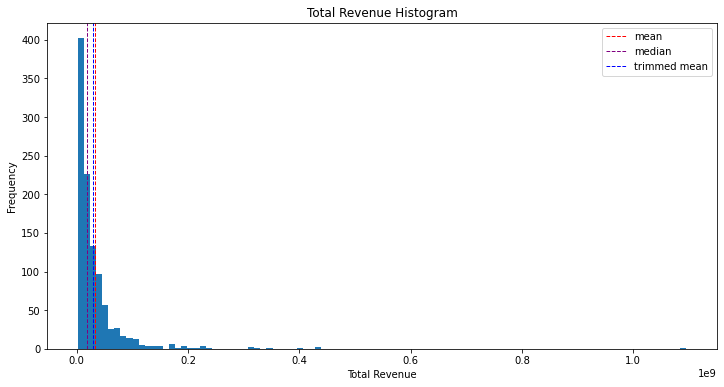

In [49]:
from cProfile import label


plt.figure(figsize=(12,6))
plt.hist(data['Totals.Revenue'], bins=100)
plt.title('Total Revenue Histogram')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.axvline(data['Totals.Revenue'].mean(), color='r', linestyle='dashed',  linewidth=1)
plt.axvline(data['Totals.Revenue'].median(), color='purple', linestyle='dashed', linewidth=1)
plt.axvline(data.loc[int(0.1*len(data)):int(0.9*len(data)),'Totals.Revenue'].mean(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['mean', 'median', 'trimmed mean'])
plt.show()

In [59]:
print('Total Revenue mean absolute deviation: ', data['Totals.Revenue'].mad())
print('Total Revenue standard deviation: ', data['Totals.Revenue'].std())
print('Total Revenue quantiles:\n', data['Totals.Revenue'].quantile([0.25, 0.5, 0.75]))

Total Revenue mean absolute deviation:  26358939.954707623
Total Revenue standard deviation:  54389418.23323047
Total Revenue quantiles:
 0.25     8600680.0
0.50    17927436.0
0.75    36710371.0
Name: Totals.Revenue, dtype: float64


<AxesSubplot:title={'center':'Total Revenue Box Plot'}>

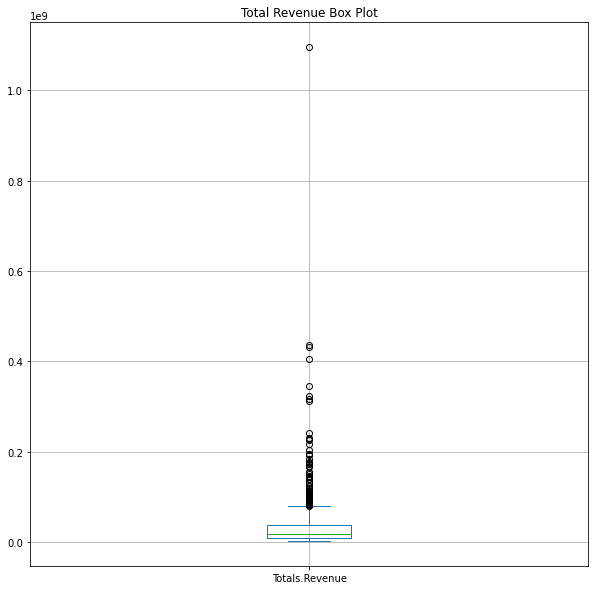

In [68]:
data['Totals.Revenue'].plot(kind='box', grid=True, title='Total Revenue Box Plot', figsize=(10,10))

In [69]:
import numpy as np
conditions = [
    (data['Totals.Revenue'] < 0.5*data['Totals.Revenue'].mean()),
    (data['Totals.Revenue'] >= 0.5*data['Totals.Revenue'].mean()) & (data['Totals.Revenue'] < data['Totals.Revenue'].mean()),
    (data['Totals.Revenue'] >= data['Totals.Revenue'].mean()),
    ]

vals = [0,1,2]

data['COL1_mean_split'] = np.select(conditions, vals)

In [71]:
data['COL1_mean_split'].value_counts()

0    481
2    311
1    259
Name: COL1_mean_split, dtype: int64

<AxesSubplot:title={'center':'Total Revenue Split by Mean'}>

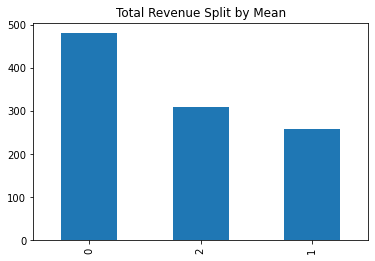

In [73]:
data['COL1_mean_split'].value_counts().plot(kind='bar', title='Total Revenue Split by Mean')

In [96]:
gbo = data.groupby('COL1_mean_split')['Totals.Revenue']
g0 = gbo.get_group(0)
g1 = gbo.get_group(1)
g2 = gbo.get_group(2)

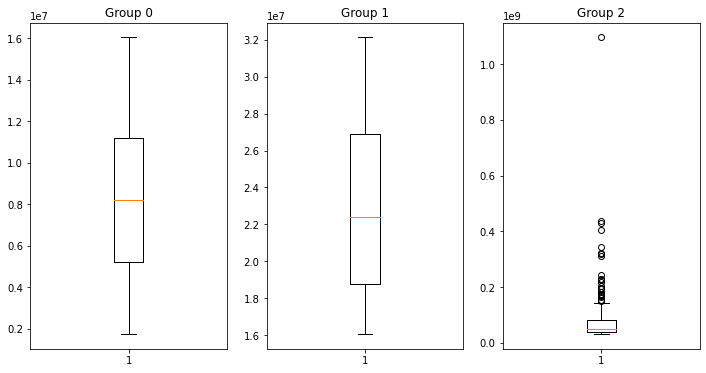

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
ax[0].boxplot(g0)
ax[1].boxplot(g1)
ax[2].boxplot(g2)
ax[0].set_title('Group 0')
ax[1].set_title('Group 1')
ax[2].set_title('Group 2')

plt.show()

In [122]:
print('The correlation coefficient of Total Revenue and Total Expenditure is: ', data['Totals.Revenue'].corr(data['Totals.Expenditure']))

The correlation coefficient of Total Revenue and Total Expenditure is:  0.9942871815389305


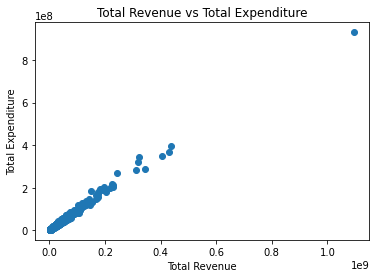

In [120]:
plt.scatter(data['Totals.Revenue'], data['Totals.Expenditure'])
plt.xlabel('Total Revenue')
plt.ylabel('Total Expenditure')
plt.title('Total Revenue vs Total Expenditure')
plt.show()

The scatter plot above shows a clear positive correlation between Total Revenue and Total Expenditure, as is expected by the correlation calculation of 0.99

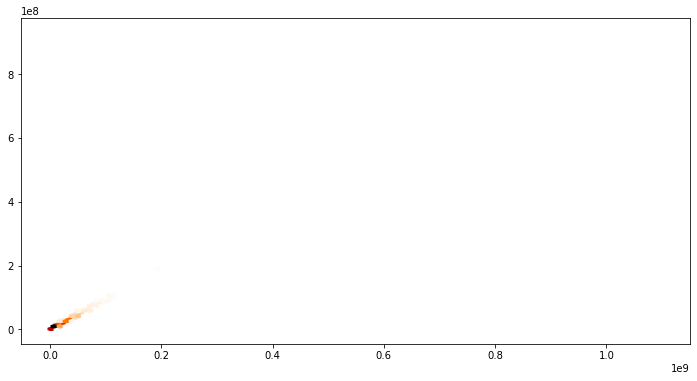

In [130]:
plt.figure(figsize=(12,6))
plt.hexbin(data['Totals.Revenue'], data['Totals.Expenditure'], cmap='gist_heat_r')